In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
from sklearn.datasets import make_classification

In [32]:
# make_classification?

In [5]:
X,y=make_classification(n_samples=800,n_features=2,n_redundant=0,n_clusters_per_class=1,random_state=0)

In [6]:
print(X.shape,y.shape)
# X=X+3
# y=y+3
m=X.shape[0]
n=X.shape[1]+1
print(m,n)

(800, 2) (800,)
800 3


In [7]:
ones=np.ones((m,1))
x_train=np.hstack((ones,X))
print(x_train.shape)

(800, 3)


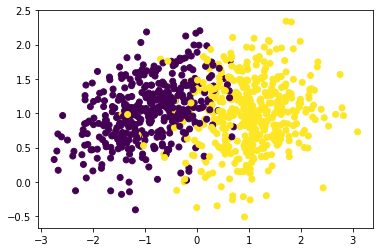

In [8]:
plt.scatter(X[:,:-1],X[:,-1],c=y)

In [9]:
def hypothesis(x,theta):
    return 1.0/(1+np.exp(-np.dot(theta,x)))

def cost(x,y,theta):
    cost=0
    for i in range(m):
        for j in range(n):
            cost+=(y[i]*math.log(hypothesis(x[i],theta)))+(1-y[i])*math.log(1-hypothesis(x[i],theta))
    return cost

def gradient(x,y,theta):
    grad=np.zeros((n,))
    for i in range(m):
        for j in range(n):
            grad[j]+=(y[i]-hypothesis(x[i],theta))*x[i][j]
    return grad/m

def GradientAscent(x,y,lr=0.1):
    theta=np.full([n,],0.1)
    cost_list=[]
    for i in range(800):
        c=cost(x,y,theta)
        grad=gradient(x,y,theta)
        for j in range(n):
            
            theta[j]+=lr*grad[j]
        cost_list.append(c)
    return cost_list,theta




In [10]:
cost,final_theta=GradientAscent(x_train,y)

In [11]:
print(final_theta)

[ 0.40852623  3.48506161 -0.65544954]


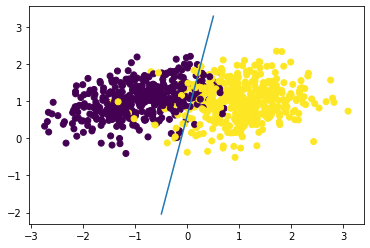

In [14]:
xtest = np.linspace(-0.5,0.5,5)
plt.scatter(X[:,:-1],X[:,-1],c=y)
plt.plot(xtest,-(final_theta[0]+final_theta[1]*xtest)/final_theta[2])

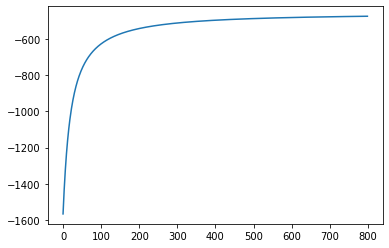

In [15]:
plt.plot(cost)